In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Implementamos un filtro de mediana (filtro de paso de baja no lineal) y comprobamos su funcionamiento sobre la imagen seleccionada.

In [18]:
def mediana(img):
    resimg=img.copy()
    for f in range(resimg.shape[0]):
        for c in range(resimg.shape[1]):
            if f==0 or f==resimg.shape[0]-1:
                resimg[f][c]=0   #Se rellena con ceros los bordes de la matriz de la imagen
            elif c==0 or c==resimg.shape[1]-1:
                resimg[f][c]=0  #Se rellena con ceros los bordes de la matriz de la imagen
            else:  #se hacen los cálculos para aplicar el filtro mediana
                sm=obtener_submatriz(img,f,c)
                resimg[f][c]=np.median(np.reshape(sm,-1))    
    return resimg

def obtener_submatriz(img,f,c):
    return img[f-1:f+2, c-1:c+2]

In [19]:
#Test sobre la matriz
img=np.array([[12,14,17,24,32,30],
            [19,18,17,26,36,40],
            [26,21,17,28,40,42],
            [20,19,18,26,33,35],
            [14,17,20,23,27,20],
            [35,14,22,13,40,21]])
print(mediana(img))

[[ 0  0  0  0  0  0]
 [ 0 17 18 26 32  0]
 [ 0 19 19 26 35  0]
 [ 0 19 20 26 28  0]
 [ 0 19 19 23 26  0]
 [ 0  0  0  0  0  0]]


Tras verificar la funcionalidad de la función implementada se aplicará el filtro a una imagen ruidosa (WorldView_-1_PAN.png) y se guardará la imagen para poder apreciar mejor los detalles.

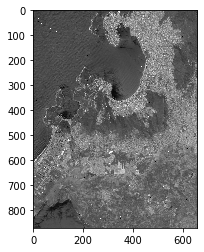

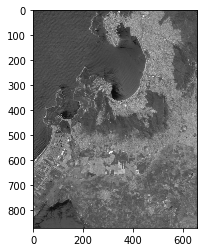

In [20]:
img=cv2.imread('../imgpack/WorldView_1-1_PAN.png',cv2.IMREAD_GRAYSCALE)
img_mediana=mediana(img)
plt.figure(1)
plt.imshow(img, cmap='gray')
plt.figure(2)
plt.imshow(img_mediana, cmap='gray')

In [21]:
cv2.imwrite("modificadas/WorldView_1-1_PAN_Filtrada.png",img_mediana)

True